# **Authors**: José Antonio Valderrama & Eric Vidal

## Qiskit Session 2  - First Quantum Algorithms

---



In this last practical session you will run on quantum machine your first quantum algorithms by implementing the algorithms seen in class.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/quantum_computer.jpeg'  width="300px" />    
    </tr>
</table>


---
## Get ready
As usual one first  import Qiskit and the vizualisation tools
```Python
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
```
And as well we load the simulator and the IBM account:

```Python
simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
from qiskit.tools.monitor import job_monitor

```
   

In [1]:
import numpy as np
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
from qiskit.tools.monitor import job_monitor


C:\Users\Jose\AppData\Local\Temp\ipykernel_17552\2678367249.py:7: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\Jose\AppData\Local\Temp\ipykernel_17552\2678367249.py:7: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


### Create an oracle

We have seen in class that it is always possible to implement a classical function with a quantum computer. Here we are going to implement classical functions usefull to run the Deutsh and Deutsch-Josza algorithm.

Consider the following circuit:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_balanced1.svg'  width="300px" />    
    </tr>
</table>

Implement this circuit and check that it corresponds to a unitary gate $U_f$ such that $U_f|x_0x_2x_3>|y>=|x_0x_1x_2>|y\oplus f(x_0,x_1,x_2)>$ where $f$ is a boolean function that satisfies:


|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$000$ |$111$|
|$011$ |$100$|
|$101$ |$010$|
|$110$ |$001$|

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


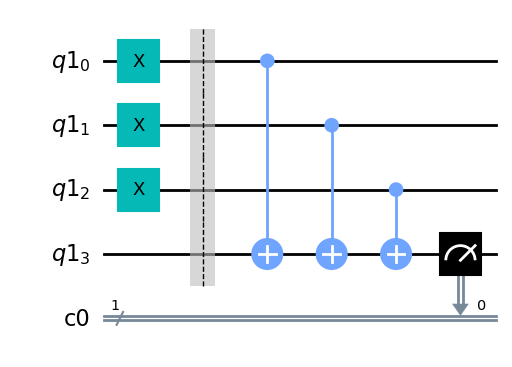

In [2]:
qr=QuantumRegister(4)
cr=ClassicalRegister(1)
circu=QuantumCircuit(qr,cr)

qbitss=[1,1,1]  #Setting the initial conditions for the q0, q1 and q2 respectively
if(qbitss[0]==1):
    circu.x(qr[0])
if(qbitss[1]==1):
    circu.x(qr[1])
if(qbitss[2]==1):
    circu.x(qr[2])
circu.barrier()

#Setting the cNOTs
circu.cx(qr[0],qr[3])
circu.cx(qr[1],qr[3])
circu.cx(qr[2],qr[3])
#Measuring the result on q3
circu.measure(qr[3],cr[0])
# Drawing the circuit
circu.draw('mpl')

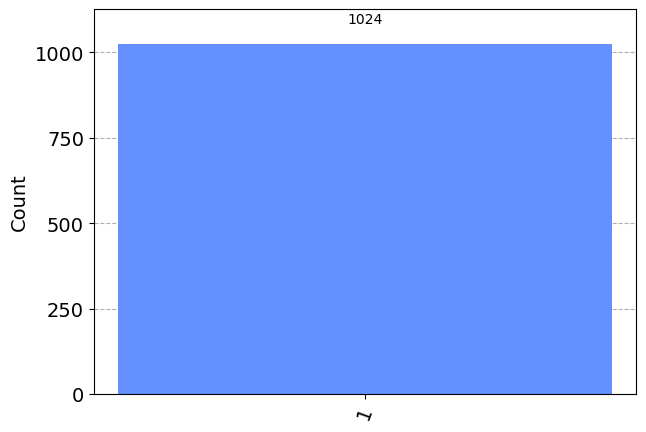

In [3]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(circu,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)  # In theory the third qubit should be the result of  f(q0,q1,q2)

Modify the previous circuit to create an other oracle $U_f$ that is defined by

|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$010$ |$101$|
|$011$ |$100$|
|$111$ |$000$|
|$110$ |$001$|

$\textbf{Answer:}$ Notice that $f(x_0,x_1,x_2)$ is simply $\bar{x}_1$ (i.e the negation of the second qubit), so everything we need to do is negate the second qbit and send the  result to the target qubit through a CNOT.

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


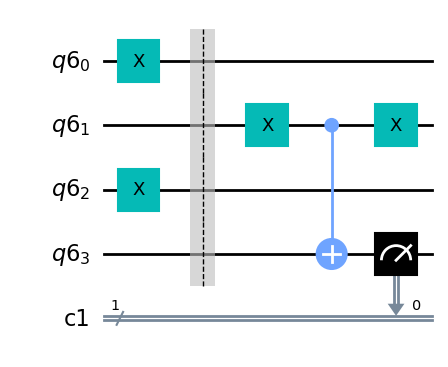

In [4]:
qr=QuantumRegister(4)
cr=ClassicalRegister(1)
circu=QuantumCircuit(qr,cr)

qbitss=[1,0,1]  # setting the initial conditions for the q0, q1 and q2 respectively
if(qbitss[0]==1):
    circu.x(qr[0])
if(qbitss[1]==1):
    circu.x(qr[1])
if(qbitss[2]==1):
    circu.x(qr[2])
circu.barrier()

#Setting the oracle
circu.x(qr[1]) #Negation of  x1
circu.cx(qr[1],qr[3]) # Sending the result to x4
circu.x(qr[1]) # Changing x1 to its original state

#Measuring the result on q3
circu.measure(qr[3],cr[0])

#Plotting the circuit
circu.draw('mpl')

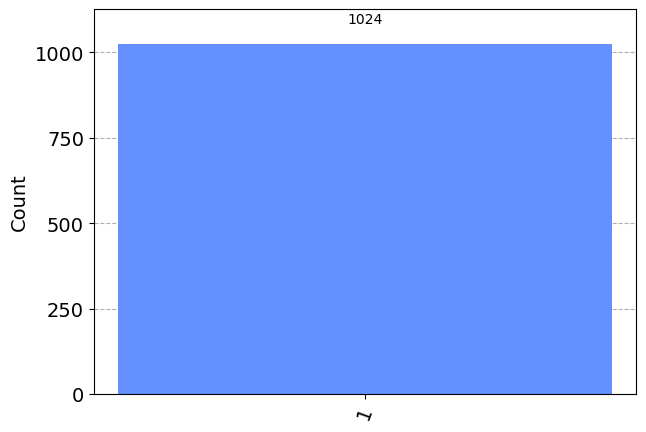

In [5]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(circu,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)  # In theory the third qubit should be f(x0,x1,x2)=NOT(x1)

What would be an oracle for a constant function $f(x_0,\dots,x_n)=k$ with $k\in\{0,1\}$ ?

$\textbf{Answer:}$ Since $f(x_0,...mx_n)$ is independent of the input, everything we have to do is avoid any link between the input qbits and the target qbit. Now, since the X gate is equivalent to adding 1 (mod 2 sum) to a qubit, if $k=1$ we apply an X gate, othewise we simply do nothing. 

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


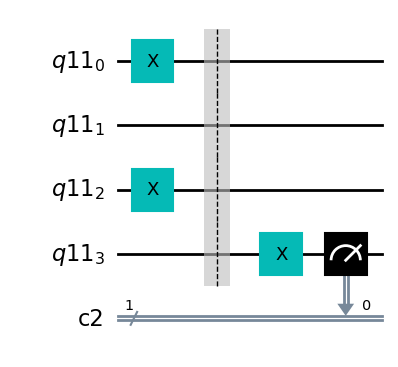

In [6]:
qr=QuantumRegister(4)
cr=ClassicalRegister(1)
circu=QuantumCircuit(qr,cr)

k=1#the value of the constant function

qbitss=[1,0,1]  #setting the initial conditions for the q0, q1 and q2 respectively

if(qbitss[0]==1):
    circu.x(qr[0])
if(qbitss[1]==1):
    circu.x(qr[1])
if(qbitss[2]==1):
    circu.x(qr[2])
circu.barrier()   
#Setting the oracle
if(k==1):
    circu.x(qr[3]) # Add a +1(mod 2 sum) if k=1
    
#Measuring the result on q3
circu.measure(qr[3],cr[0])

#Drawing the circuit
circu.draw('mpl')

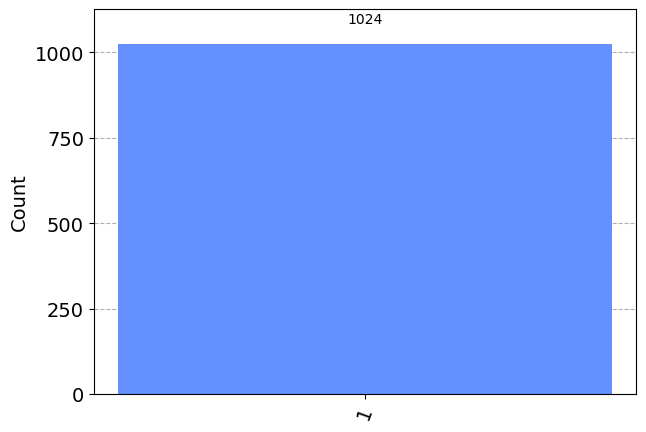

In [8]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(circu,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)  # In theory the third qubit should be k

## Deutsch-Josza

Recall the circuit of the Deutsch-Josza algorithm that generalizes Deutsch algorithm

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_steps.png'  width="400px" />    
    </tr>
</table>

Define a constant oracle $U_{f_1}$ and a balanced oracle $U_{f_2}$ of your choice and check on your example the validity of Deutsch-Josza's algorithm.

For the constant function, we'll choose $f(x_0,x_1,...,x_n)=\bar{x}_1$, and for the constant function we'll choose $f(x_0,x_1,...,x_n)=1$ .

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


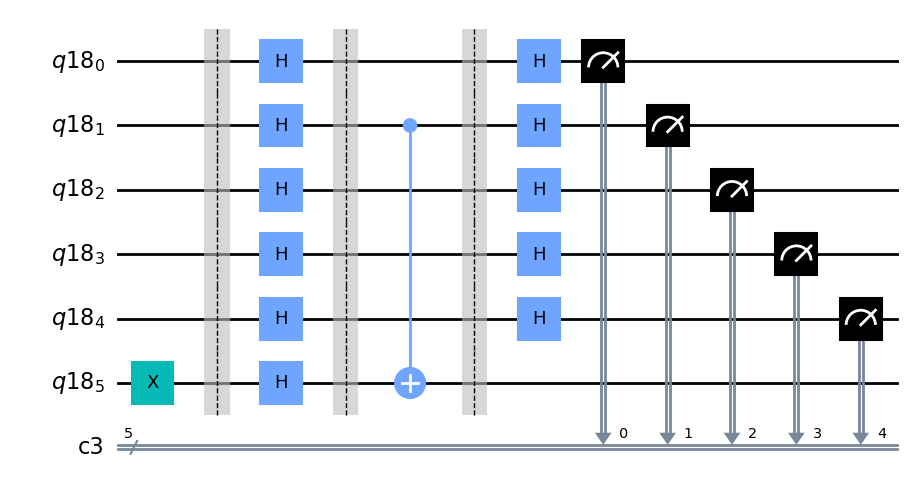

In [9]:
balanced=1 #Set equal to 1 if balanced, set equal to 0 if constant

#Setting up  the circuuit

nqbits=5 #Number of input qubits

qr=QuantumRegister(nqbits+1)
cr=ClassicalRegister(nqbits)
DJosza=QuantumCircuit(qr,cr)

# Applying the first set of gates
DJosza.x(qr[nqbits]) # First qubit on |1>
DJosza.barrier() 
for qbts in range(nqbits+1):
    DJosza.h(qr[qbts])
DJosza.barrier() 

# Using the  oracle
if (balanced==1): #Balanced oracle f(qbits)= NOT(first qubit)
    DJosza.cx(qr[1],qr[nqbits])
if (balanced==0): #Constant oracle f(qbits)= 1
    DJosza.x(qr[nqbits])
DJosza.barrier() 

#Last Hadamards and measurements
for qbts in range(nqbits):
    DJosza.h(qr[qbts])
    DJosza.measure(qr[qbts],cr[qbts])
    
#Plotting the circuit
DJosza.draw('mpl')
  


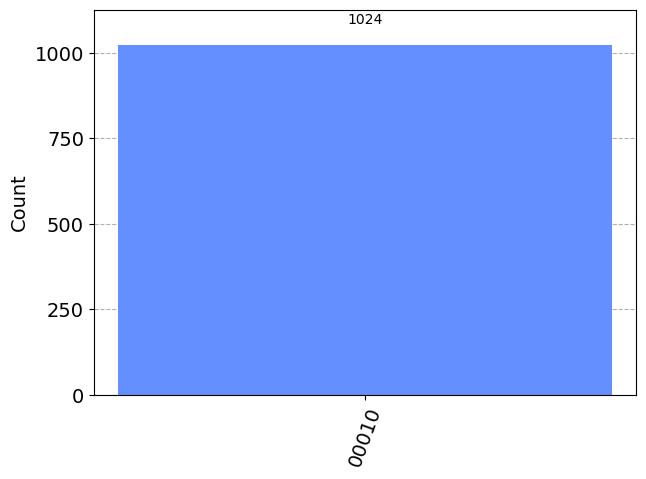

In [10]:
#Simulating 
simulator=Aer.get_backend('qasm_simulator')
result=execute(DJosza,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)  # If constant, the first n qbits should be all 0, OTHERWISE we measure different things

## Bernstein-Vazirani

Bernstein-Vazirani algorithm is an algorithm that solve the following problem:
Let $u=u_{n-1}\dots u_0\in \{0,1\}^n$ an unknown $n$-bits string. Suppose you have a classical function $f:\{0,1\}^n\to \{0,1\}$ which calculates $f_u(x)=x.u [2]$ where $x.u$ is the usual inner product between $n$-bits strings, i.e. $x=x_{n-1}\dots x_0$ and $$x.u=x_0u_0+x_1u_1+\dots+x_{n-1}u_{n-1}$$

The goal of Bernstein-Vazirani's algorithm is to find $u$.

Recall that classically you can find $u$ by testing $n$ values $x\in \{0,1\}^n$. Bernstein-Vazirani's algorithm solves the problem by using only once the function $f$.

### Implementing the function $f_u$

Show that the following circuit implements on the function $f_u$ with $u=1101$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vaziraniu.png'  width="330px" />    
    </tr>
</table>

Implement a circuit that corresponds to the function $f_u$ with $u=1010101$.


$\textbf{Answer:}$ In general,  the action of a CNOT on a state $|\psi \rangle$ of the computational basis is
$$CNOT_{i,j}|x_0,...,x_i,...,x_j,...,x_n\rangle = |x_0,...,x_i,...,x_j\oplus x_i,...,x_n\rangle$$
So for the circuit presented above we have
$$CNOT_{0,4}CNOT_{2,4}CNOT_{3,4}|x_0,x_1,x_2,x_3,x_4\rangle=|x_0,x_1,x_2,x_3,x_4 \oplus x_0 \oplus x_2 \oplus x_3\rangle$$
But we can rewrite
$$ |x_0,x_1,x_2,x_3,x_4 \oplus x_0 \oplus x_2 \oplus x_3\rangle = |x_0,x_1,x_2,x_3,x_4 \oplus 1*x_0 \oplus 0*x_1 \oplus 1*x_2 \oplus 1*x_3\rangle= |x_0,x_1,x_2,x_3,x_4 \oplus u\cdot x \rangle$$

Where we took into account that, for some reason, the exercise's convention for the left-most bit on $u$ is $x_4$.

$\textbf{Implementation:}$ Following the ideas above presented, we implemented a function for $u=1010101$ by linking the qubits associated to '$1$' to the target  qbit through a CNOT.

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


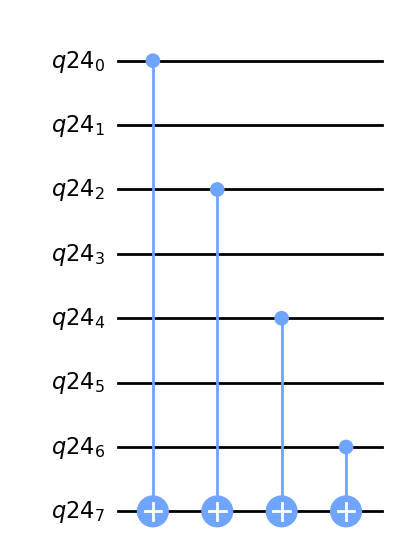

In [11]:
qr=QuantumRegister(8) # 7 input bits and 1 output bit where the  information is added into
bitdot=QuantumCircuit(qr)
for ii in range(4):
    bitdot.cx(qr[2*ii],qr[7])
bitdot.draw('mpl')

Write a Python function that given $u=u_{n-1}\dots u_0$ will creates the Quantum Circuit implementing the gate $U_{f_u}$. 

You can use define $u$ as a sting $u='u_{n-1}\dots u_0'$ and use the Python command: 
```Python 
enumerate
```

$\textbf{Solution:}$ Now it's just a matter of putting the previous into a loop running through the bitstring $u$ and adding CNOTs if a $1$ is found. The result is shown below.

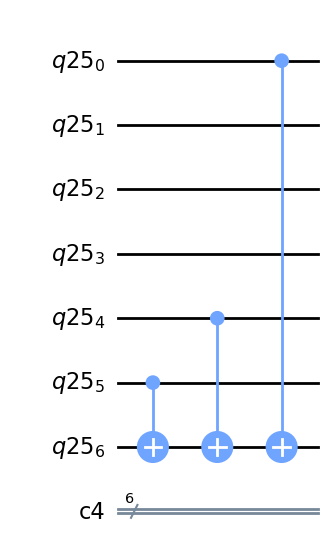

In [12]:
def BeVaOracle(circuit,qr,Bvbits,targetqubit): 
    nbits=len(Bvbits)
    for bit in range(nbits):
        if(Bvbits[bit]==1): # Apply a CNOT if the bit is 1
            circuit.cx(qr[nbits-bit-1],qr[targetqubit]) # The (nbits-bit-1) is necessary because of the convention of the first bit being at the last register...
    
# Example
u=[1,1,0,0,0,1] #Bit string  to be used
nbits=len(u)
qr=QuantumRegister(nbits+1)
cm=ClassicalRegister(nbits)
Oracl=QuantumCircuit(qr,cm)
BeVaOracle(Oracl,qr,u,nbits) #Applying the Oracle

#Plotting the circuit
Oracl.draw('mpl')

### Bernstein-Vazirani Circuit

Here is the circuit of Benrstein-Vazirani's algorithm that allows you to find $u$ by only computing once the function $f_u$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vazirani.png'  width="330px" />    
    </tr>
</table>


Implement Bernstein-Vazirani's algorithm such as, the function $f_u$ is defined by the choice of $u=u_{n-1}\dots u_0$ made by the user and the circuit and measurementsof the circuit are automatically created from the knowledge of $u$.

Test your algorithm on the simulator.

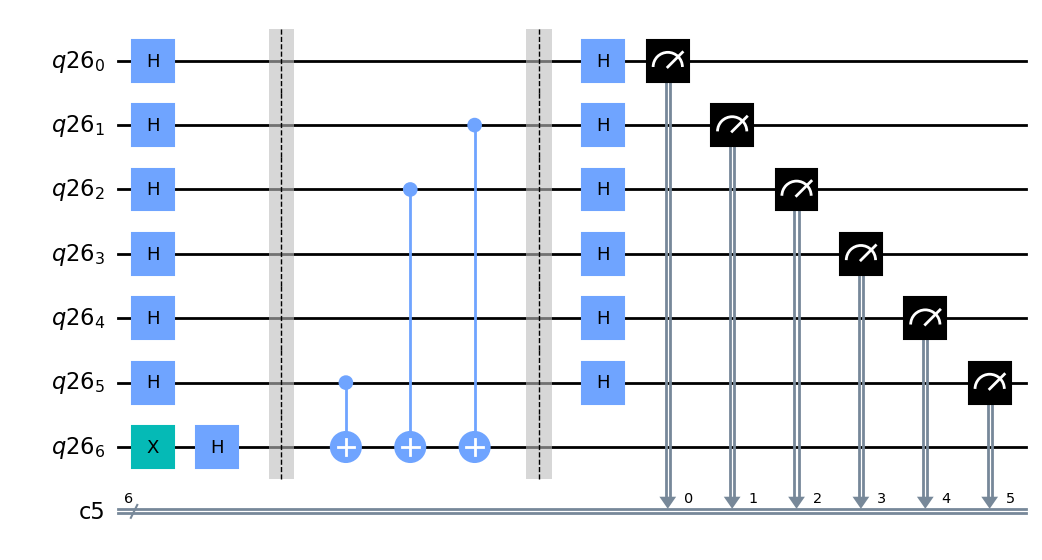

In [13]:
u=[1,0,0,1,1,0] #Bit string  to be used
nbits=len(u)
qr=QuantumRegister(nbits+1)
cm=ClassicalRegister(nbits)
BernVazi=QuantumCircuit(qr,cm)

# applying the first set of gates
BernVazi.x(qr[nbits])
for qbts in range(nbits+1):
    BernVazi.h(qr[qbts])
    
#Oracle
BernVazi.barrier()
BeVaOracle(BernVazi,qr,u,nbits)
BernVazi.barrier()

#Last part
for qbts in range(nbits):
    BernVazi.h(qr[qbts])
    BernVazi.measure(qr[qbts],cm[qbts])

#Plotting the circuit
BernVazi.draw('mpl')

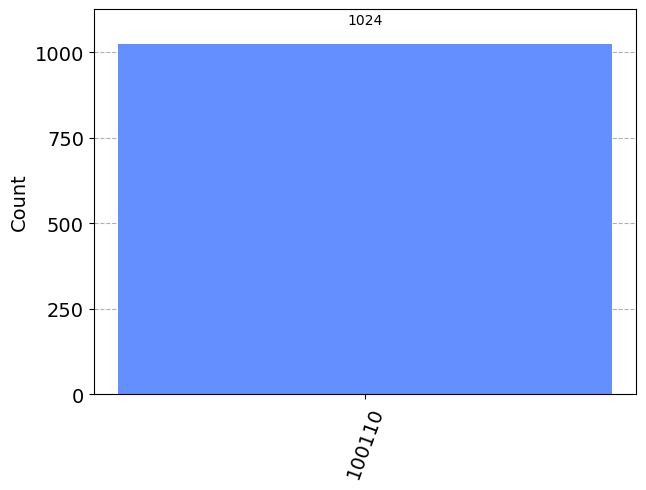

In [14]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(BernVazi,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) # Should get u(leftmost bit is the one at the bottom).

Test your code on a real quantum device.

In [ ]:
# Takes too long so we skipped this.

## Grover's algorithm

Grover's algorithm is based on two gates, the oracle and the diffusion gate.
We will implement Grover's algorithm for a three-qubit system.


### The oracle

Consider the following circuit:


<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/oracle_3qbt.png'  width="330px" />    
    </tr>
</table>

Check that this oracle signs the element $|111>$.
How can you modify if so it signs the element $|101>$ ?

$\textbf{Solution:}$ If we start with the following bell state on the first two qubits and the third qbit on  $|1\rangle$
$$\frac{|00 \rangle + |11 \rangle }{\sqrt{2}}\otimes |1\rangle,$$
note the action of the operator above defined on the state would be
$$U \left( \frac{|001\rangle + |111\rangle }{\sqrt{2}} \right) =\frac{|001\rangle - |111\rangle }{\sqrt{2}}=\frac{|00 \rangle - |11 \rangle }{\sqrt{2}}\otimes |1\rangle.$$
That is, the oracle would change the first two qubits to another bell state. This change is something that can be measured by applying an inverse transformation from the bell states to the computational basis which follows
$$\frac{|00 \rangle + |11 \rangle }{\sqrt{2}} \longrightarrow |00\rangle$$
$$\frac{|01 \rangle + |10 \rangle }{\sqrt{2}} \longrightarrow |01\rangle$$
$$\frac{|00 \rangle - |11 \rangle }{\sqrt{2}} \longrightarrow |10\rangle$$
$$\frac{|01 \rangle - |10 \rangle }{\sqrt{2}} \longrightarrow |11\rangle$$

Which is easily achieved with a Hadamard and a CNOT. Therefore, applying the transformation above after $U$, $\textit{if the oracle works}$, in the end we should measure $|10\rangle$ on the first two qubits with probability 1.


C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


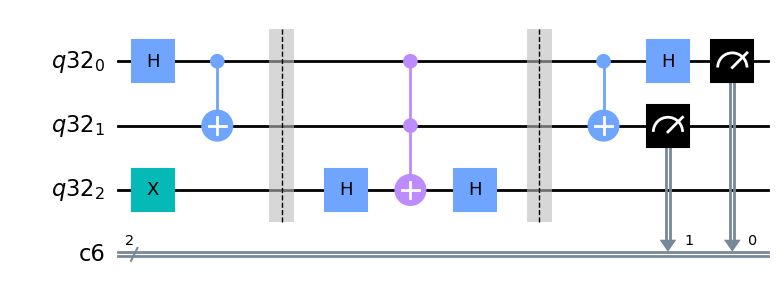

In [15]:
################## Putting a sign on |111> ###################
qr=QuantumRegister(3)
cr=ClassicalRegister(2)
sgncirc=QuantumCircuit(qr,cr)

# IF THE ORACLE SIGNS |111>, AT THE END OF EVERYTHING  THE TWO QBITs SHOULD BE AT |10>

#First,  we put the the qbits on state (|00>+|11>)|1> 
sgncirc.h(qr[0])
sgncirc.cx(qr[0],qr[1]) # Setting Bell state, because the transformation does |00> ------> (|00>+|11>) 
sgncirc.x(qr[2]) # setting the third qubit on |1> 

#Oracle
sgncirc.barrier()
sgncirc.h(qr[2])
sgncirc.ccx(qr[0],qr[1],qr[2])
sgncirc.h(qr[2])
sgncirc.barrier()

# If the oracle worked, we should  now have (|00>-|11>)|1>
# Using the transformation from bell states  to computational basis, the first two qbits should be at |10>
sgncirc.cx(qr[0],qr[1])
sgncirc.h(qr[0])
sgncirc.measure(qr[0],cr[0]) #Measure 
sgncirc.measure(qr[1],cr[1])

sgncirc.draw('mpl')

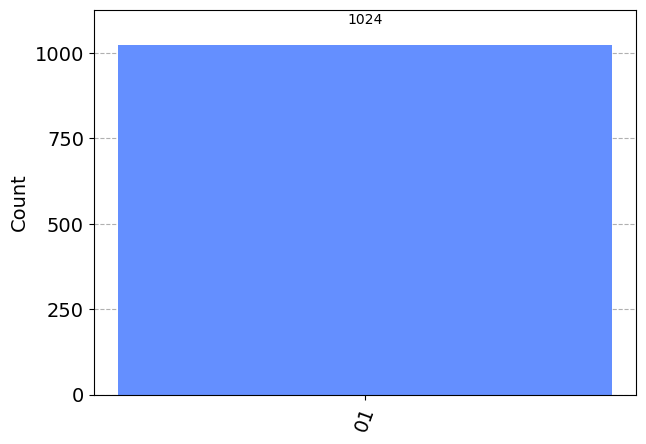

In [16]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(sgncirc,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) # Should get |10>, FIRST QUBIT IS UPSTAIRS

$\textbf{Signing 101}:$ To create the oracle which signs  101, we simply modify the given oracle that signs 111 and make it so that the Toffoli gate is activated when the second qbit is 0, by adding an X gate before the control and then an X gate after to return the qbit to its original state.  The circuit is illustrated below

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


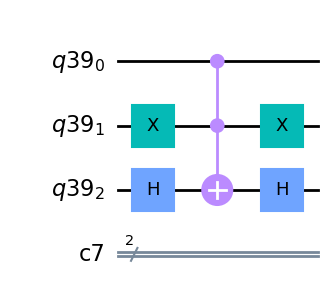

In [17]:
qr=QuantumRegister(3)
cr=ClassicalRegister(2)
sgncirc=QuantumCircuit(qr,cr)
# Oracle which signs 101
sgncirc.h(qr[2])
sgncirc.x(qr[1])
sgncirc.ccx(qr[0],qr[1],qr[2])
sgncirc.x(qr[1])
sgncirc.h(qr[2])
sgncirc.draw('mpl')


$\textbf{To  test it}$, we use similar ideas to what was done with the previous oracle, that is, if we start with the state
$$\frac{|01\rangle+|10\rangle}{\sqrt{2}}\otimes|1\rangle,$$
and apply the oracle 
$$U\left( \frac{|011\rangle+|101\rangle}{\sqrt{2}} \right) =\frac{|011\rangle-|101\rangle}{\sqrt{2}}=\frac{|01\rangle-|10\rangle}{\sqrt{2}}\otimes |1\rangle,$$
we see that, again, the bell state on the first two qubits changes. Therefore if we apply the transformation to the computational basis, following the previouly given rules, we should now measure $|11\rangle$ with probability 1.

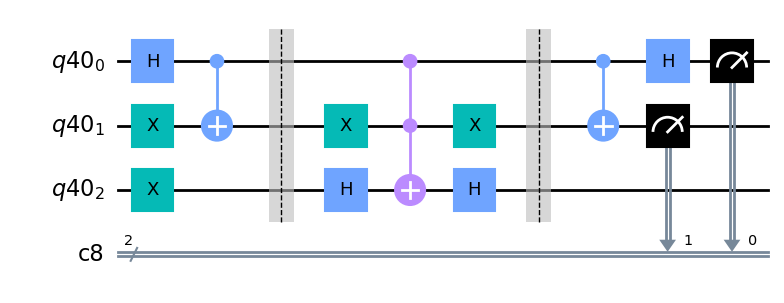

In [18]:
################## Putting a sign on |101> and testing it ###################

qr=QuantumRegister(3)
cr=ClassicalRegister(2)
sgncirc=QuantumCircuit(qr,cr)

# IF THE ORACLE SIGNS |101>, AT THE END OF EVERYTHING  THE TWO QBITs SHOULD BE AT |11>

#First,  we put the the qbits on state(|01>+|10>)|1> 
sgncirc.x(qr[1])
sgncirc.h(qr[0])
sgncirc.cx(qr[0],qr[1]) # Setting Bell state, because the transformation does |01> -----> (|01>+|10>) 
sgncirc.x(qr[2]) # setting |1> on the third qubit 

#Oracle
sgncirc.barrier()
sgncirc.h(qr[2])
sgncirc.x(qr[1])
sgncirc.ccx(qr[0],qr[1],qr[2])
sgncirc.x(qr[1])
sgncirc.h(qr[2])
sgncirc.barrier()

# If the oracle worked, we should  now have (|01>-|10>)|1>

# Using the transformation from Bell states  to computational basis, the first two qbits should be at |11>
sgncirc.cx(qr[0],qr[1])
sgncirc.h(qr[0])

sgncirc.measure(qr[0],cr[0]) #Measure 
sgncirc.measure(qr[1],cr[1])

sgncirc.draw('mpl')

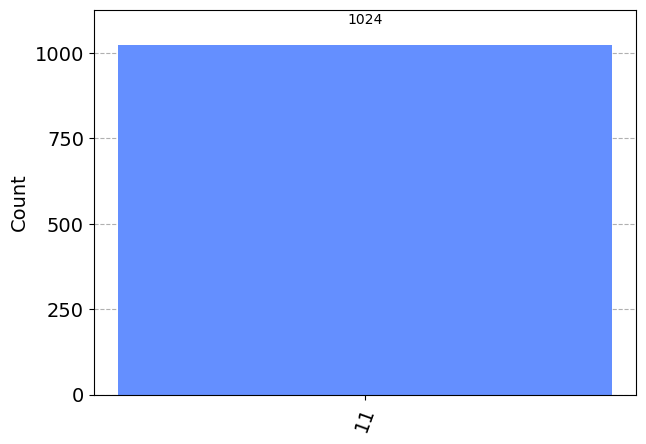

In [19]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(sgncirc,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) # Should get |11>, FIRST QUBIT IS UPSTAIRS

### The diffusion operator

Check that the following circuit corresponds to a CCZ gate i.e. a Control-control $Z$ gate:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/CCZ.png'  width="330px" />    
    </tr>
</table>

The corresponding matrix is 

$$CCZ=\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

And thus the circuit

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion1.png'  width="330px" />    
    </tr>
</table>

corresponds to $-(2|0><0|-I_8)$, i.e.

$$CCZ=-\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & -1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & -1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & -1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

Conclude that the diffusion operator, as explained in the lecture, is given by:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion.png'  width="330px" />    
    </tr>
</table>



$\textbf{Solution:} \textit{ As it was previouly demonstrated}$, the first gate signs the state $|111\rangle$, that is, if $|u\rangle$ is an element of the computational basis, the effect of the  gate is
$$ |u\rangle \longrightarrow |u\rangle \quad \text{if $|u\rangle \neq |111\rangle $},$$
$$ |u\rangle \longrightarrow -|u\rangle \quad \text{if $|u\rangle = |111\rangle $},$$
i.e it's and identity operator unless it acts on the last element of the computational basis(for which it adds -1),  so its associated matrix is clearly the one for a CCZ gate.

Now, as before dicussed, if we add X gates to the side of the gate on one line, the effect will  be to change a 1  to a 0 on the signed bit-string, Therefore adding X gates to the sides on the all lines signs $|000 \rangle$, that is
$$ |u\rangle \longrightarrow |u\rangle \quad \text{if $|u\rangle \neq |000\rangle $},$$
$$ |u\rangle \longrightarrow -|u\rangle \quad \text{if $|u\rangle = |000\rangle $},$$

Which is precisely the behabiour of $I_8 -2 |000 \rangle \langle 000 |$, therefore $\textit{we conclude that the last operator shown is indeed Grover's diffusion operator}$.

On what follows, we put the diffusion operator in a function(which will later be key for the implementation of Grover's algorithm) and plot it.

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


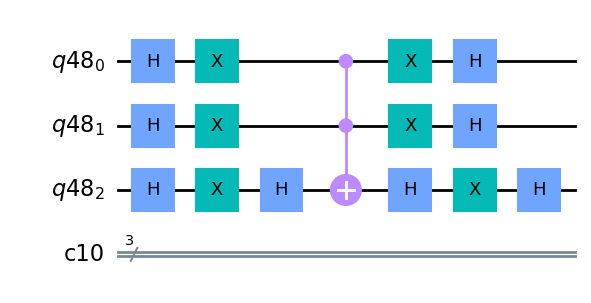

In [21]:
def difusionOperator(diffcirc): #Putting the diffusion operator in a  function
    for ii in range(3):
        diffcirc.h(qr[ii])
        diffcirc.x(qr[ii])
    diffcirc.h(qr[2])
    diffcirc.ccx(qr[0],qr[1],qr[2])
    for ii in range(2):
        diffcirc.x(qr[ii])
        diffcirc.h(qr[ii])
    diffcirc.h(qr[2])
    diffcirc.x(qr[2]) 
    diffcirc.h(qr[2])

qr=QuantumRegister(3)
cr=ClassicalRegister(3)
dcirc=QuantumCircuit(qr,cr)

difusionOperator(dcirc)

dcirc.draw('mpl')


### Implement Grover algorithm

Based on the previous question, implement grover's algorithm for $x_0=|101>$ and run it on the simulator and the IBM Quantum Experience

$\textbf{Solution:}$ Using the ideas from the previous sections, the application of Grover's algorith is straight forward, since we already have the oracle that signs 101 and the diffusion operator. So it's just  a matter of applying a set of hadamards and repeat the application of the  oracle and the diffusion operator $\pi \sqrt{2^3}/4 \approx 2$ times.

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


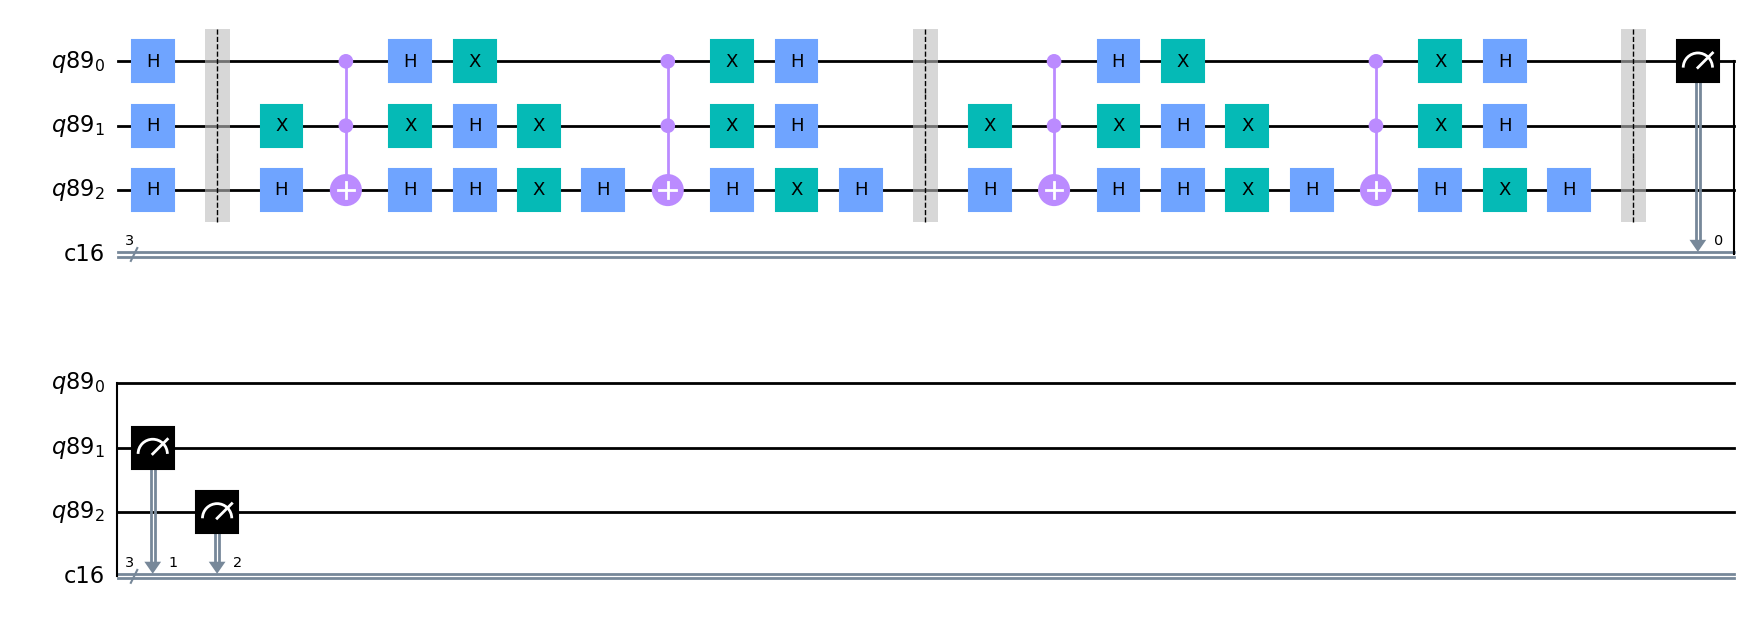

In [35]:
def  sign101(sgncirc): #Oracle that signs 101
    sgncirc.h(qr[2])
    sgncirc.x(qr[1])
    sgncirc.ccx(qr[0],qr[1],qr[2])
    sgncirc.x(qr[1])
    sgncirc.h(qr[2])   

qr=QuantumRegister(3)
cr=ClassicalRegister(3)
Grovers=QuantumCircuit(qr,cr)
for ii in range(3):
    Grovers.h(qr[ii])
    
#Grover's algorith loop
iterations= round(np.pi * np.sqrt(2**3)/4)
for iteration in range(iterations):
    Grovers.barrier()
    sign101(Grovers)
    difusionOperator(Grovers)
Grovers.barrier()  

#Measuring
Grovers.measure(qr,cr)

#Plotting
Grovers.draw('mpl')

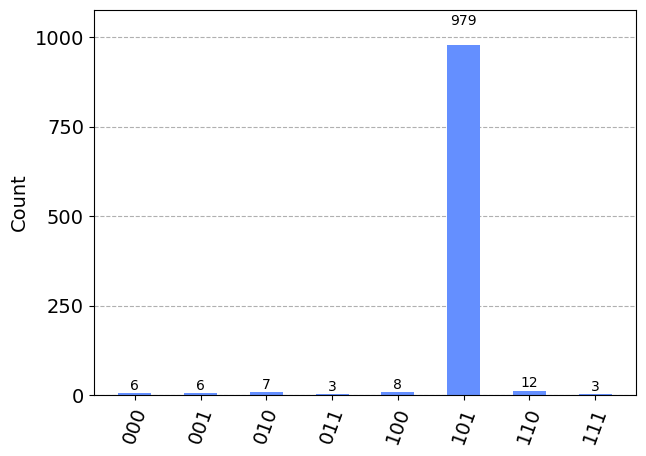

In [36]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(Grovers,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) #SHOULD GET 101

## Exercises

### Exercise 1

Write a Qiksit Script that implement Grover's algorithm for a given 3 qubit states $|x_2x_1x_0>$.

### Exercise 2

How would you implement Grover's algorithm for 4 qubits ?


### Solution to exercise 1(Grover's algorithm  with 3 qubits):
We already implemented  the algorithm for 3 qbits with the 101 bit-string, now its a matter of generalizing the oracle. Again,  everything we need to do is take  the oracle that signs 111 and add X gates to the sides of a line in case the desired bit string has  a 0  instead of a 1 in a given position. 

C:\Users\Jose\miniconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


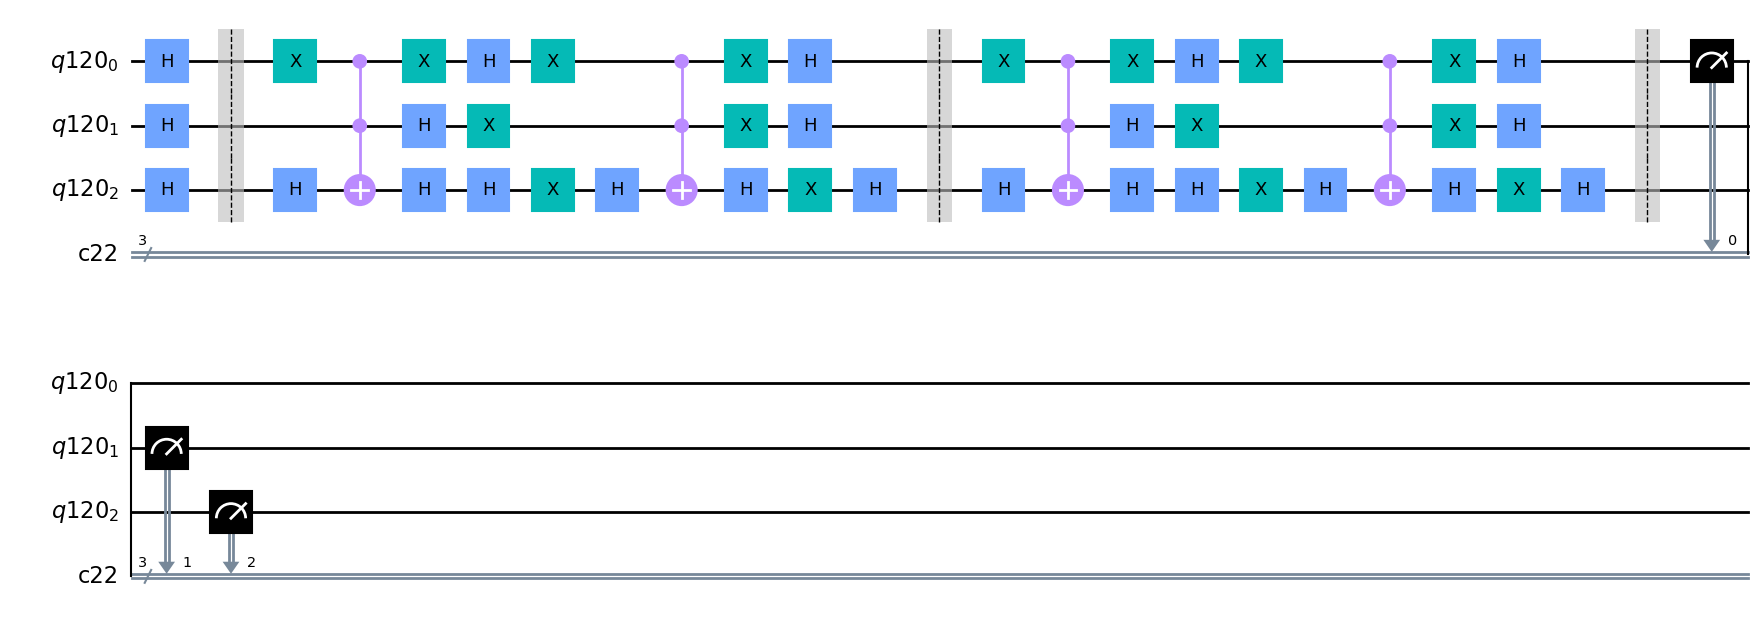

In [46]:
def  sign3bit(circuit,bits,qr): #General oracle for  3 qbits
    for bit in range(3):
        if(bits[bit]==0):
            circuit.x(qr[2-bit]) #The 2-bit is because the exercise's convention is to put the leftmost bit at the bottom
    circuit.h(qr[2])
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.h(qr[2])
    for bit in range(3):
        if(bits[bit]==0):
            circuit.x(qr[2-bit]) 
            
def difusionOperator(diffcirc): # 3 qubits  diffusion operator
    for ii in range(3):
        diffcirc.h(qr[ii])
        diffcirc.x(qr[ii])
    diffcirc.h(qr[2])
    diffcirc.ccx(qr[0],qr[1],qr[2])
    for ii in range(2):
        diffcirc.x(qr[ii])
        diffcirc.h(qr[ii])
    diffcirc.h(qr[2])
    diffcirc.x(qr[2]) 
    diffcirc.h(qr[2])
    
signthis=[1,1,0]   # <------------------------Bit to sign

qr=QuantumRegister(3)
cr=ClassicalRegister(3)
Grovers=QuantumCircuit(qr,cr)

for ii in range(3):
    Grovers.h(qr[ii])
    
#Grover's algorith loop
iterations= round(np.pi * np.sqrt(2**3)/4)
for iteration in range(iterations):
    Grovers.barrier()
    sign3bit(Grovers,signthis,qr)
    difusionOperator(Grovers)
Grovers.barrier()

#Measuring and plotting
Grovers.measure(qr,cr)
Grovers.draw('mpl')

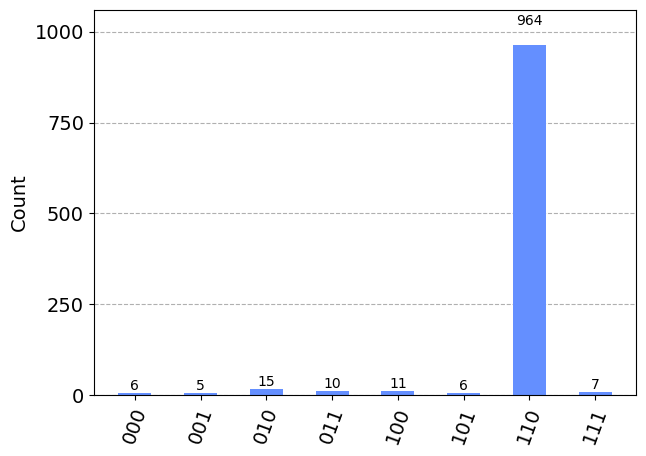

In [47]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(Grovers,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) #Should get u=110(as preset in the code, but can be changed) THE FIRST BIT IS AT THE BOTTOM

### Solution to exercise 2(4  and more qubits):
It's straight forward to generalize from 3 to n qubits, since the gate that signs the state $|11...1 \rangle$ is a multicontrol X with two  hadamard at the sides on the (last) target qubit. From the previous, it's direct to generalize the diffucion operator and the oracle, so everything we have to do is add a bigger for loop, depending on the amount of qubits(in this case 4), and apply the oracle and diffusion operator $\pi \sqrt{2^n}/4$ times. 

C:\Users\Jose\AppData\Local\Temp\ipykernel_17552\1600739862.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  circuit.mct([qr[ii] for ii in range(N-1)], qr[N-1]) #Multi-controlled NOT gate
C:\Users\Jose\AppData\Local\Temp\ipykernel_17552\1600739862.py:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  diffcirc.mct([qr[ii] for ii in range(N-1)], qr[N-1])


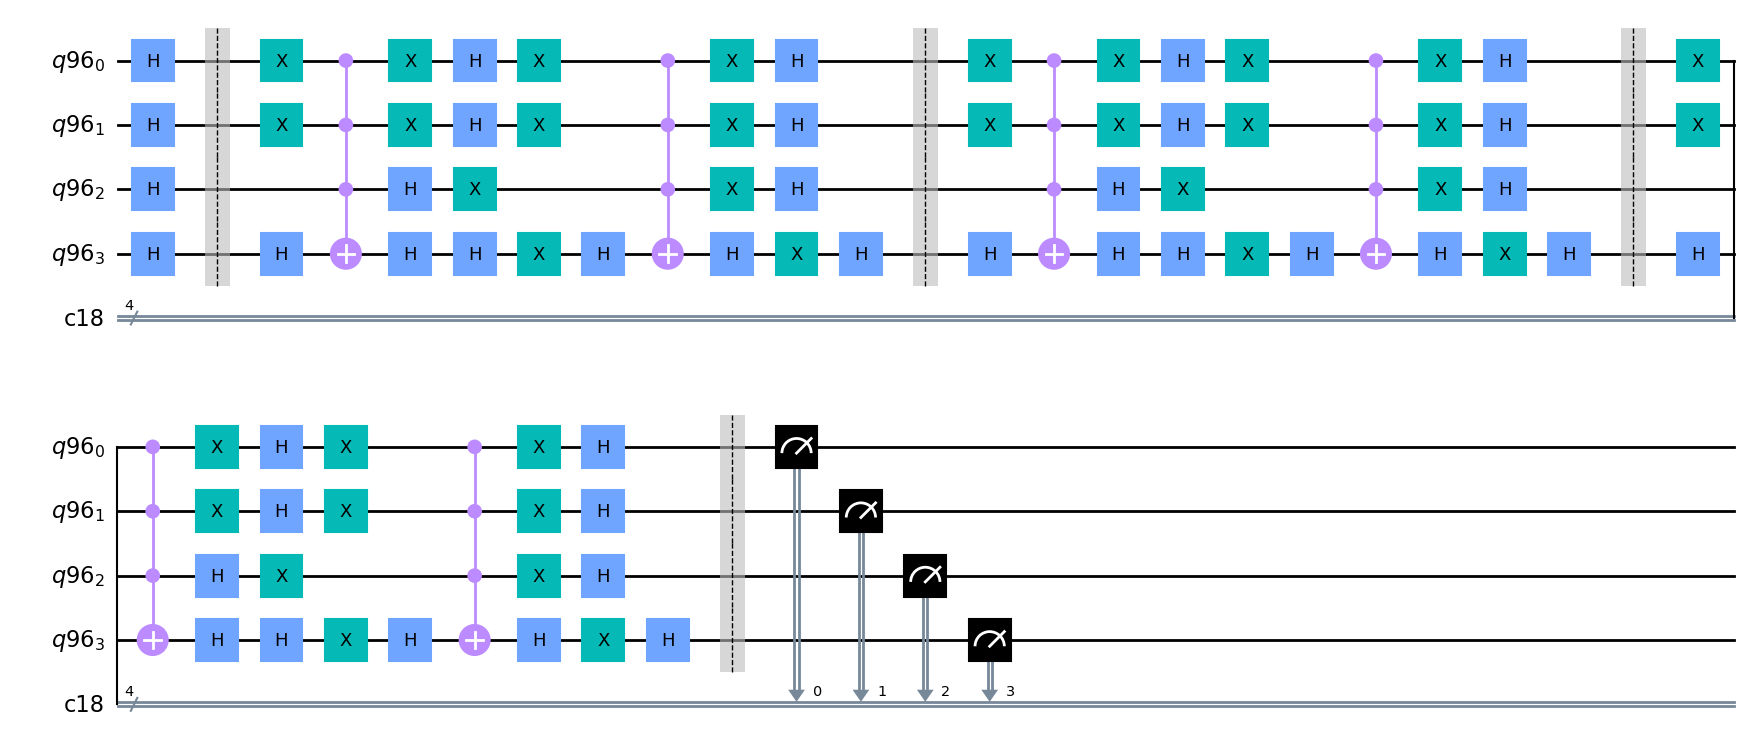

In [38]:
def  signNbit(circuit,bits,qr): #Generalized oracle
    N=len(bits)
    for bit in range(N):
        if(bits[bit]==0):
            circuit.x(qr[N-1-bit]) # The N-1-bit comes from the exercise's convention to put the leftmot bit at the bottom
    circuit.h(qr[N-1])
    circuit.mct([qr[ii] for ii in range(N-1)], qr[N-1]) #Multi-controlled NOT gate
    circuit.h(qr[N-1])
    for bit in range(N):
        if(bits[bit]==0):
            circuit.x(qr[N-1-bit])
            

def NdifusionOperator(diffcirc,qr,N): #Generalized diffusion operator
    for ii in range(N):
        diffcirc.h(qr[ii])
        diffcirc.x(qr[ii])
    diffcirc.h(qr[N-1])
    diffcirc.mct([qr[ii] for ii in range(N-1)], qr[N-1])
    for ii in range(N-1):
        diffcirc.x(qr[ii])
        diffcirc.h(qr[ii])
    diffcirc.h(qr[N-1])
    diffcirc.x(qr[N-1]) 
    diffcirc.h(qr[N-1])
    
signthis=[1,1,0,0] # BIT STRING TO BE SIGNED
N=len(signthis)
qr=QuantumRegister(N)
cr=ClassicalRegister(N)
NGrovers=QuantumCircuit(qr,cr)
for ii in range(N):
    NGrovers.h(qr[ii])
    
#Grover's algorith loop
loops=round(np.pi*np.sqrt(2**N)/4)
for ii in range(loops):
    NGrovers.barrier()
    signNbit(NGrovers,signthis,qr)
    NdifusionOperator(NGrovers,qr,N)
NGrovers.barrier()   
     
NGrovers.measure(qr,cr)
NGrovers.draw('mpl')



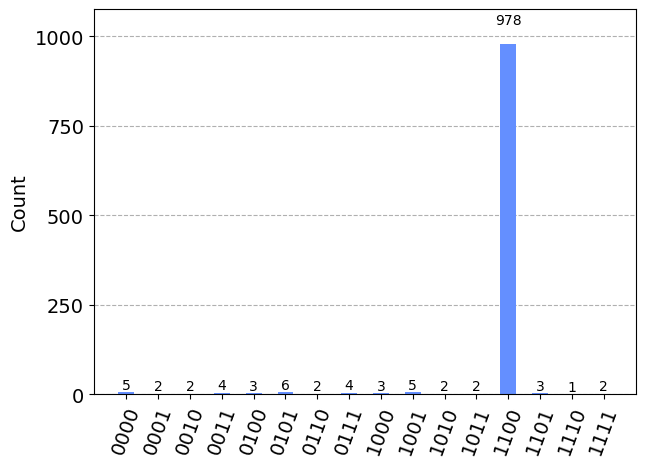

In [39]:
#Simulating
simulator=Aer.get_backend('qasm_simulator')
result=execute(NGrovers,backend = simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts) ##Should get u=1100(as preset in the code, but can be changed) THE FIRST BIT IS AT THE BOTTOM